## Stopword Identification

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import matplotlib.pyplot as plt
import seaborn as sns
import json

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('../data/preprocessed_subreddit_data.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df['fulltext'] = df['title'] + ' ' + df['selftext']

In [5]:
freefolk = df[df['subreddit']=='freefolk']
gameofthrones = df[df['subreddit']=='gameofthrones']
asoiaf = df[df['subreddit']=='asoiaf']

In [6]:
df['subreddit'].value_counts(normalize=True)

asoiaf           0.443182
freefolk         0.283519
gameofthrones    0.273299
Name: subreddit, dtype: float64

In [7]:
df_vec = CountVectorizer(stop_words='english',
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))

df_tab = df_vec.fit_transform(df['fulltext'])
df_pd = pd.DataFrame(df_tab.toarray(), columns=df_vec.get_feature_names())

In [8]:
ff_vec = CountVectorizer(stop_words='english',
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))
ff_tab = ff_vec.fit_transform(freefolk['fulltext'])
ff_pd = pd.DataFrame(ff_tab.toarray(), columns=ff_vec.get_feature_names())

In [9]:
got_vec = CountVectorizer(stop_words='english',
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))

got_tab = got_vec.fit_transform(gameofthrones['fulltext'])
got_pd = pd.DataFrame(got_tab.toarray(), columns=got_vec.get_feature_names())

In [10]:
asoiaf_vec = CountVectorizer(stop_words='english',
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))

asoiaf_tab = asoiaf_vec.fit_transform(asoiaf['fulltext'])
asoiaf_pd = pd.DataFrame(asoiaf_tab.toarray(), columns=asoiaf_vec.get_feature_names())

We're going to take the 100 most common words overall and in each subset and isolate common words to each to add to our stopwords list:

In [11]:
most_common_overall = df_pd.mean().sort_values(ascending=False)[0:100]

most_common_ff = ff_pd.mean().sort_values(ascending=False)[0:100]

most_common_got = got_pd.mean().sort_values(ascending=False)[0:100]

most_common_asoiaf = asoiaf_pd.mean().sort_values(ascending=False)[0:100]

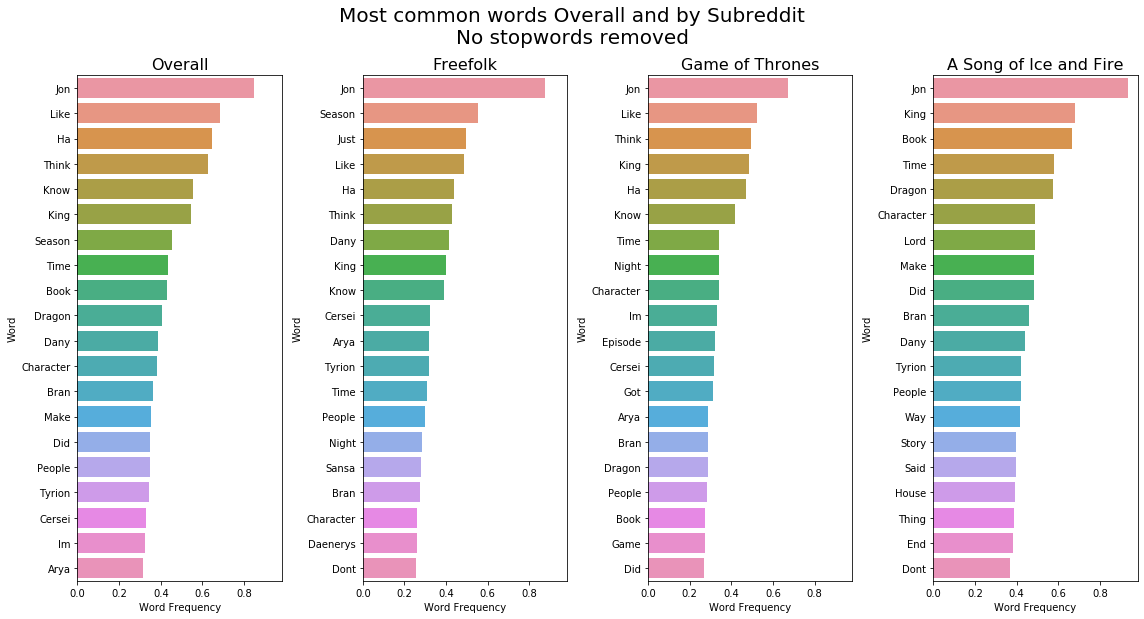

In [12]:
tables = [most_common_overall,most_common_ff,most_common_got,most_common_asoiaf]
titles = ['Overall','Freefolk','Game of Thrones','A Song of Ice and Fire']

fig, ax = plt.subplots(1,4, sharex=True, figsize=(16,8))
axs = ax.ravel()
fig.suptitle('Most common words Overall and by Subreddit\nNo stopwords removed', fontsize=20, y=1.07)
for i, ax in enumerate(axs):
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel('Word Frequency')
    ax.set_ylabel('Word')
    sns.barplot(tables[i][0:20],tables[i].index.str.title()[0:20], orient='h', ax=ax)
fig.tight_layout()

In [13]:
common_ff = most_common_ff[~(most_common_ff - most_common_overall).isna()]

common_got = most_common_got[~(most_common_got - most_common_overall).isna()]

common_asoiaf = most_common_asoiaf[~(most_common_asoiaf - most_common_overall).isna()]

In [14]:
a =common_ff[~(common_ff - common_got).isna()]

b=common_ff[~(common_ff - common_asoiaf).isna()]

c=common_asoiaf[~(common_asoiaf - common_got).isna()]

d=common_asoiaf[~(common_asoiaf - common_ff).isna()]

e=common_got[~(common_got - common_ff).isna()]

f=common_got[~(common_got - common_asoiaf).isna()]

In [15]:
custom_stopwords = list((a+b+c+d+e+f).index)
len(custom_stopwords)

86

There are a few additional stopwords that we would like to add based on context. In particular, r/asoiaf titles are required to have spoiler tags. Passing these spoiler tags to our models would be cheating, as this is a format only seen on one of our subreddits and has nothing to do with the content of the posts.

Also, for some reason the word `just` has escaped our filtering, so we will remove that as well.

In [16]:
custom_stopwords += ['spoiler','spoilers','extended','main','just','thats']

In [17]:
custom_stopwords

['army',
 'arya',
 'battle',
 'believe',
 'book',
 'bran',
 'cersei',
 'character',
 'child',
 'come',
 'daenerys',
 'dany',
 'dead',
 'death',
 'did',
 'didnt',
 'doe',
 'doesnt',
 'dont',
 'dragon',
 'end',
 'episode',
 'game',
 'going',
 'good',
 'got',
 'great',
 'ha',
 'hand',
 'house',
 'im',
 'jaime',
 'jon',
 'kill',
 'king',
 'kings',
 'know',
 'lannister',
 'life',
 'like',
 'long',
 'look',
 'lord',
 'love',
 'make',
 'man',
 'maybe',
 'mean',
 'men',
 'ned',
 'need',
 'night',
 'night king',
 'north',
 'people',
 'point',
 'really',
 'right',
 'said',
 'sansa',
 'say',
 'scene',
 'season',
 'series',
 'snow',
 'stark',
 'story',
 'sword',
 'targaryen',
 'tell',
 'theory',
 'thing',
 'think',
 'thought',
 'throne',
 'time',
 'tyrion',
 'wall',
 'want',
 'war',
 'watch',
 'way',
 'westeros',
 'white',
 'winterfell',
 'year',
 'spoiler',
 'spoilers',
 'extended',
 'main',
 'just',
 'thats']

In [18]:
stop_words = list(text.ENGLISH_STOP_WORDS.union(custom_stopwords))

In [19]:
stop_words = {'words':stop_words}

In [20]:
with open('../data/stop_words.json', 'w') as fp:
    json.dump(stop_words, fp)